# 3. Denoising Module Tutorial

This notebook demonstrates how to use the `denoising.py` module to smooth raw sarcomere length data. It loads the average sarcomere length signal file generated in the detection step and applies Gaussian Process Regression to produce a smoothed signal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Import the core function from your module
from src.denoising import smooth_sarcomere_lengths_with_gpr

# --- Configuration ---
INPUT_DIR = Path("data")
OUTPUT_DIR = Path("results")

ND2_FILENAME = "Quartz.2862.D1.Myk.baseline.GFP.m002.nd2" # <<< IMPORTANT: CHANGE THIS TO YOUR ND2 FILE NAME
OUTPUT_FILENAME = ND2_FILENAME[:-4]

# Define paths
OUTPUT_DIR.mkdir(parents=True, exist_ok=True) # Ensure output directory exists

<div style="background-color: #e6f7ff; border-left: 6px solid #1890ff; padding: 16px; margin: 16px 0; border-radius: 4px; color: black;">
<h4><b>Note on GPR Performance</b></h4>
<p>Gaussian Process Regression (GPR) computation is significantly faster on a GPU. If you are working with large datasets or need to process multiple samples, it is highly recommended to use a GPU to reduce processing time.</p>
</div>

Iter 20 / 500 - Loss: 0.626 | Noise: 0.520
Iter 40 / 500 - Loss: 0.475 | Noise: 0.372
Iter 60 / 500 - Loss: 0.295 | Noise: 0.259
Iter 80 / 500 - Loss: 0.096 | Noise: 0.176
Iter 100 / 500 - Loss: -0.103 | Noise: 0.117
Iter 120 / 500 - Loss: -0.289 | Noise: 0.078
Iter 140 / 500 - Loss: -0.500 | Noise: 0.051
Iter 160 / 500 - Loss: -0.689 | Noise: 0.033
Iter 180 / 500 - Loss: -0.856 | Noise: 0.022
Iter 200 / 500 - Loss: -1.009 | Noise: 0.015
Iter 220 / 500 - Loss: -1.110 | Noise: 0.010
Iter 240 / 500 - Loss: -1.245 | Noise: 0.007
Iter 260 / 500 - Loss: -1.292 | Noise: 0.005
Iter 280 / 500 - Loss: -1.319 | Noise: 0.004
Iter 300 / 500 - Loss: -1.302 | Noise: 0.003
Iter 320 / 500 - Loss: -1.359 | Noise: 0.002
Iter 340 / 500 - Loss: -1.323 | Noise: 0.002


/projectnb/lejlab2/saeed/all-sarcgraph/adam-data-new-high-framerate/sarcgraph-video/.venv/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:296: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Saved smoothed signal to results/Quartz.2862.D1.Myk.baseline.GFP.m002_denoised_sarcomere_length.csv


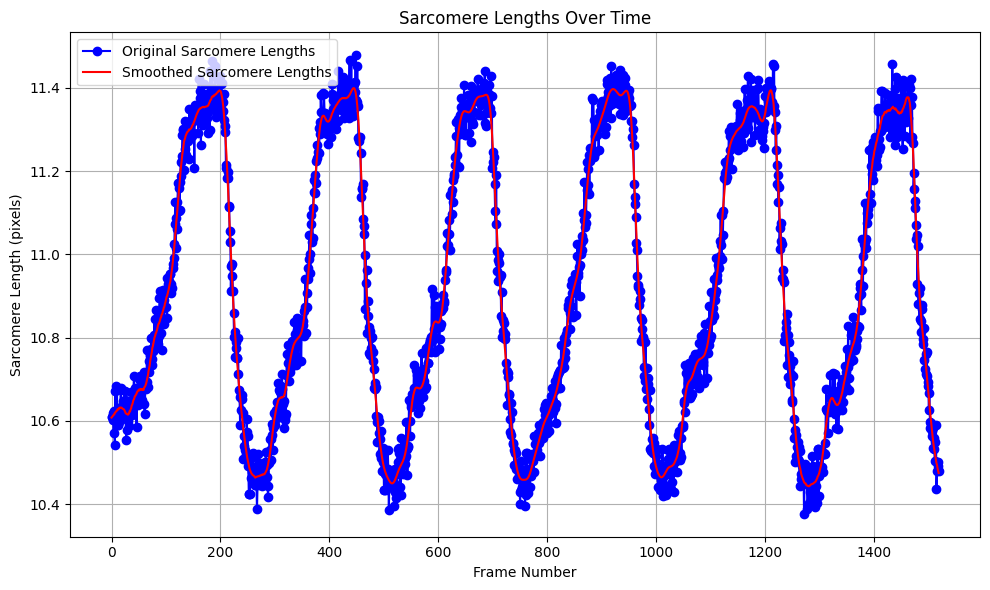

In [2]:
# Load sarcomere length data
sarcomeres_csv_path = OUTPUT_DIR / f"{OUTPUT_FILENAME}_detection_results_sarcomeres.csv"
sarcomeres_df = pd.read_csv(sarcomeres_csv_path)

# Extract average sarcomere lengths vs frame number
frame_numbers = sarcomeres_df.groupby("frame")["frame"].mean().values
sarcomere_lengths = sarcomeres_df.groupby("frame")["length"].mean().values

# Smooth the sarcomere lengths using Gaussian Process Regression
output_csv_path = OUTPUT_DIR / f"{OUTPUT_FILENAME}_denoised_sarcomere_length.csv"
smoothed_lengths = smooth_sarcomere_lengths_with_gpr(frame_numbers, sarcomere_lengths, output_csv_path)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, sarcomere_lengths, label='Original Sarcomere Lengths', marker='o', linestyle='-', color='blue')
plt.plot(frame_numbers, smoothed_lengths, label='Smoothed Sarcomere Lengths', color='red')
plt.title('Sarcomere Lengths Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Sarcomere Length (pixels)')
plt.legend()
plt.grid()
plt.tight_layout()
# Save the plot
